<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.1: Bagging

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset (`breast-cancer-wisconsin-data-old.csv`). The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed=42


In [2]:
# Load the data
df = pd.read_csv("../../DATA/breast-cancer-wisconsin-data-old.csv")

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_number                699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Cell_Size_Uniformity         699 non-null    int64 
 3   Cell_Shape_Uniformity        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
df.head()

,Sample_number,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.set_index('Sample_number', inplace=True)


In [6]:
df[df['Bare_Nuclei'] == "?"]

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_number,,,,,,,,,,
1057013,8,4,5,1,2,?,7,3,1,4
1096800,6,6,6,9,6,?,7,8,1,2
1183246,1,1,1,1,1,?,2,1,1,2
1184840,1,1,3,1,2,?,2,1,1,2
1193683,1,1,2,1,3,?,1,1,1,2
1197510,5,1,1,1,2,?,3,1,1,2
1241232,3,1,4,1,2,?,3,1,1,2
169356,3,1,1,1,2,?,3,1,1,2
432809,3,1,3,1,2,?,2,1,1,2


C:\Users\zive9\AppData\Local\Temp\ipykernel_7776\1282182190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Bare_Nuclei'] = df_clean['Bare_Nuclei'].astype(int)


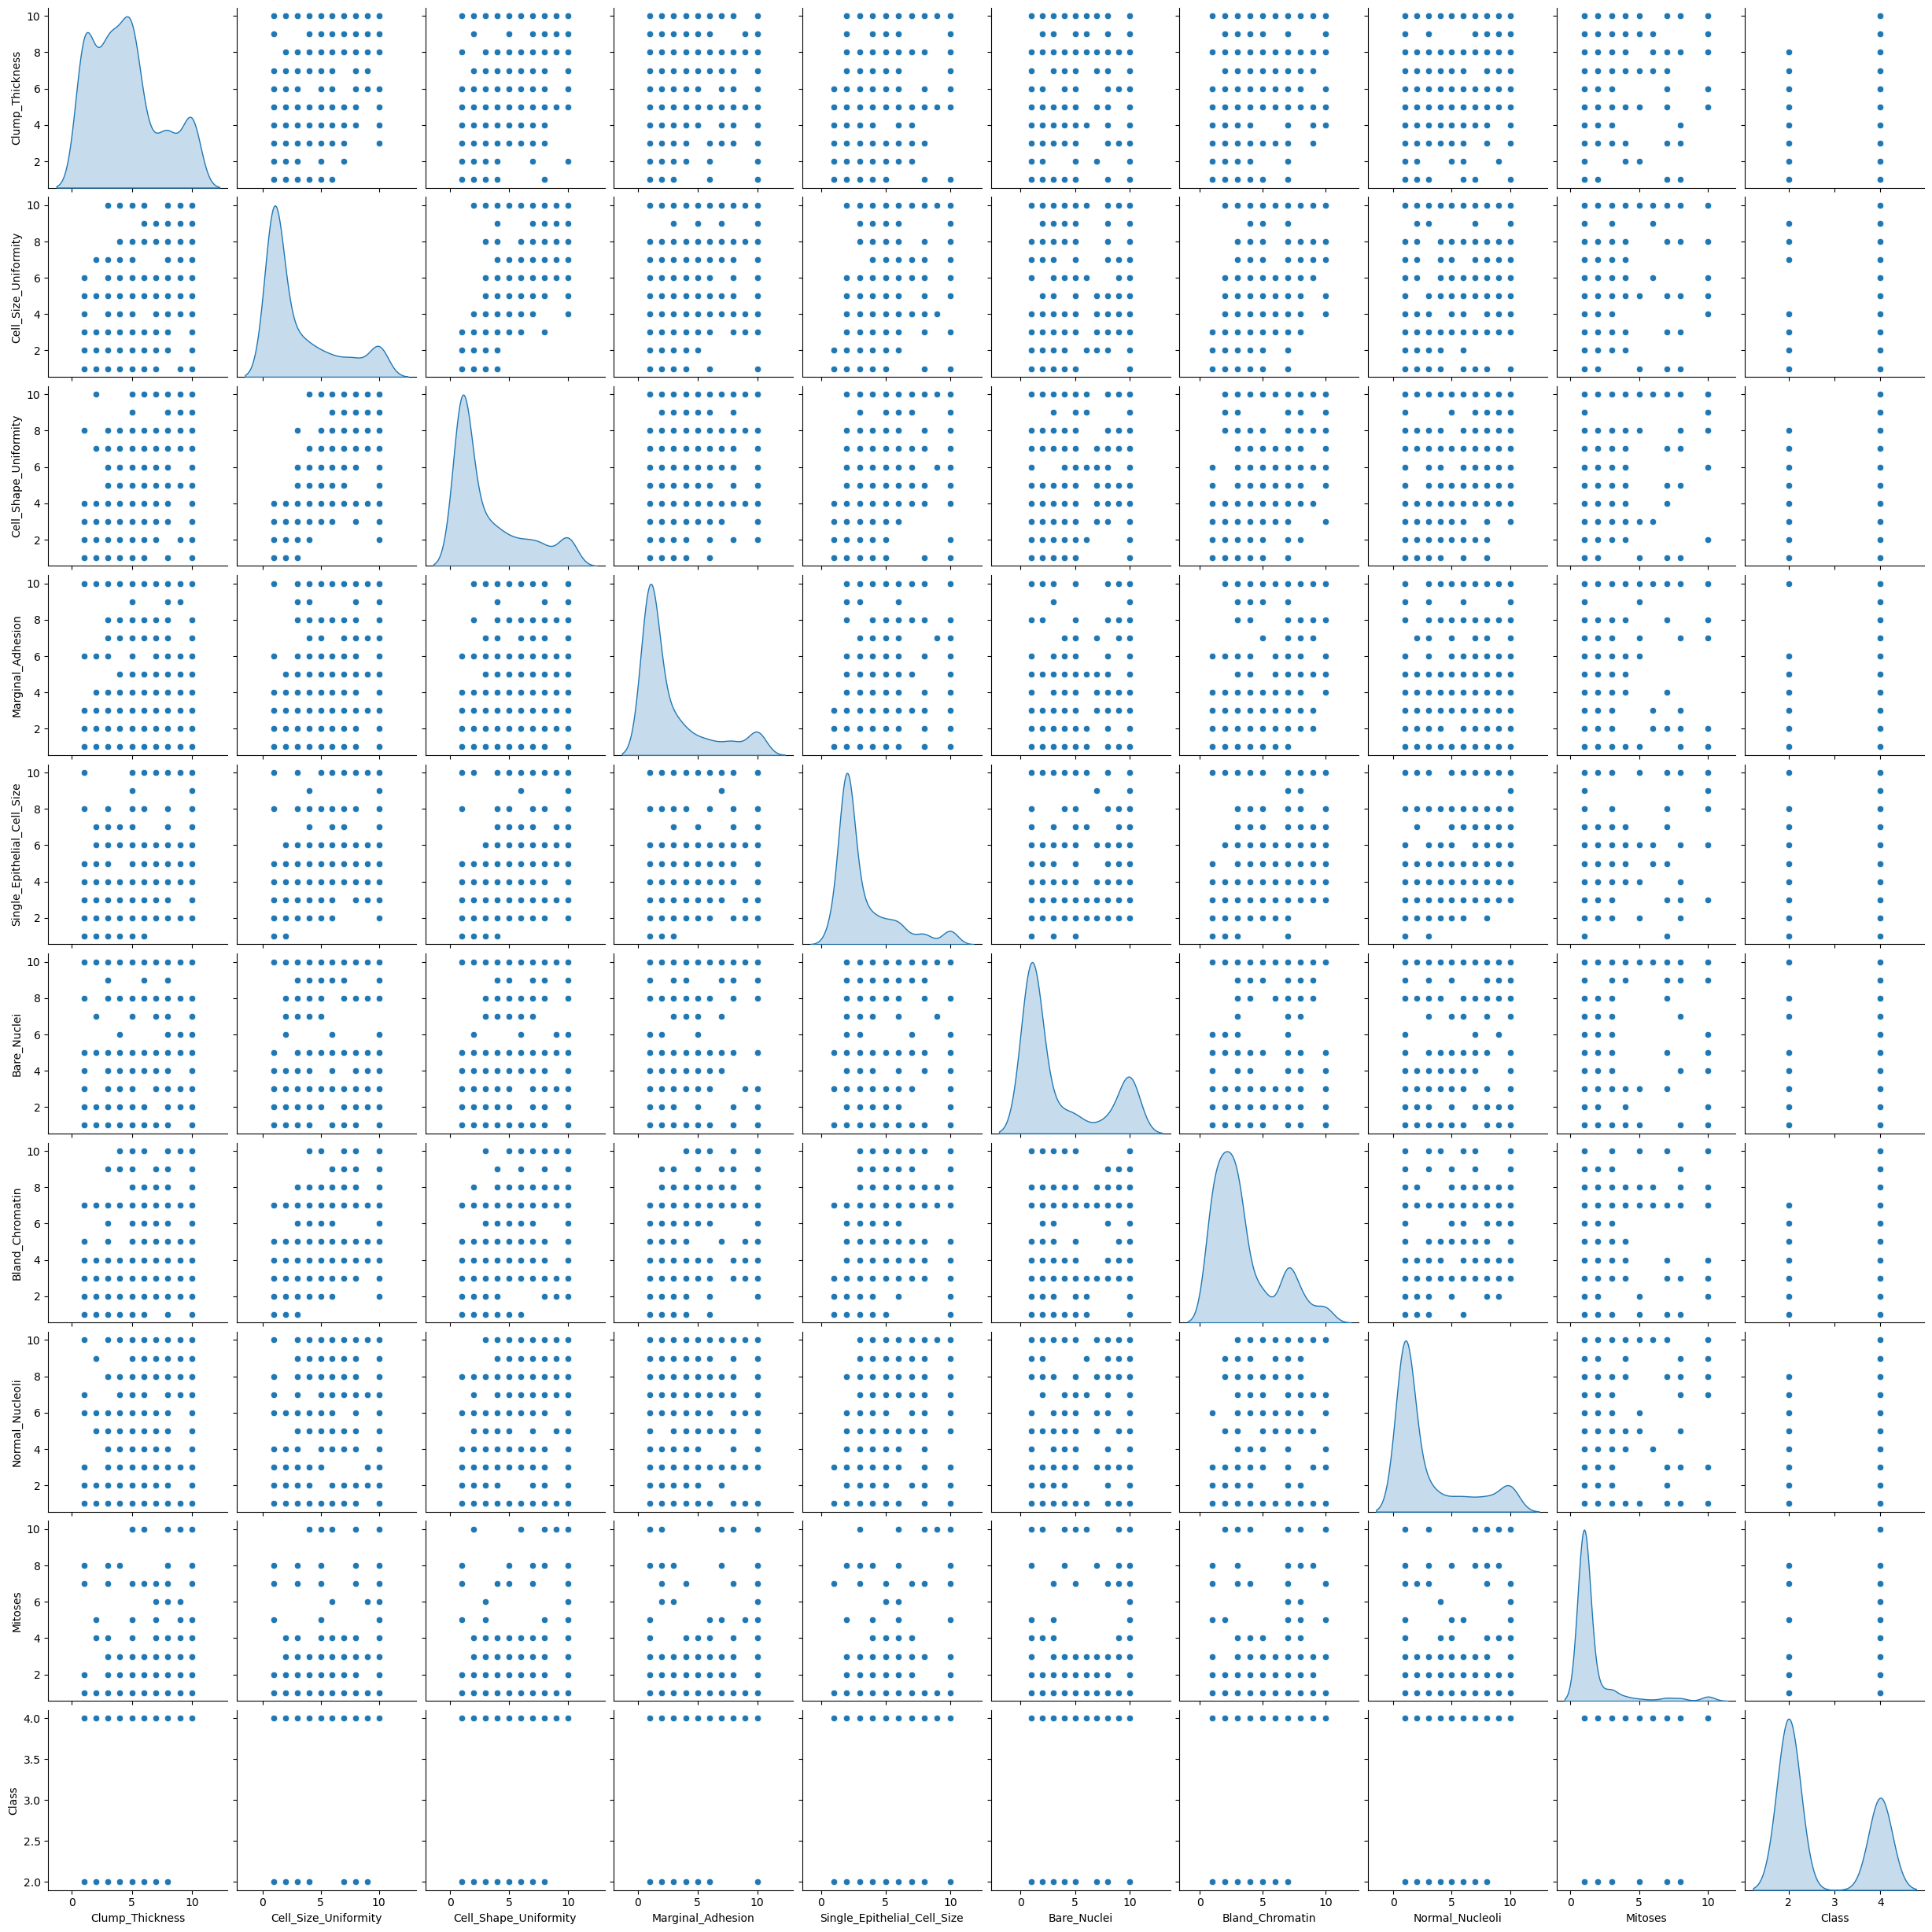

In [7]:
df_clean = df[df['Bare_Nuclei'] != "?"]
df_clean['Bare_Nuclei'] = df_clean['Bare_Nuclei'].astype(int)
sns.pairplot(df_clean, diag_kind='kde')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell_Size_Uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell_Shape_Uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bland_Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [9]:
df['Mitoses'].value_counts()

Mitoses
1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: count, dtype: int64

In [10]:
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

In [11]:
# Impute the missing Bare_Nuclei values with the median 
df['Bare_Nuclei'] = df['Bare_Nuclei'].replace("?", np.nan)
df['Bare_Nuclei'] = df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].median())
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(int)


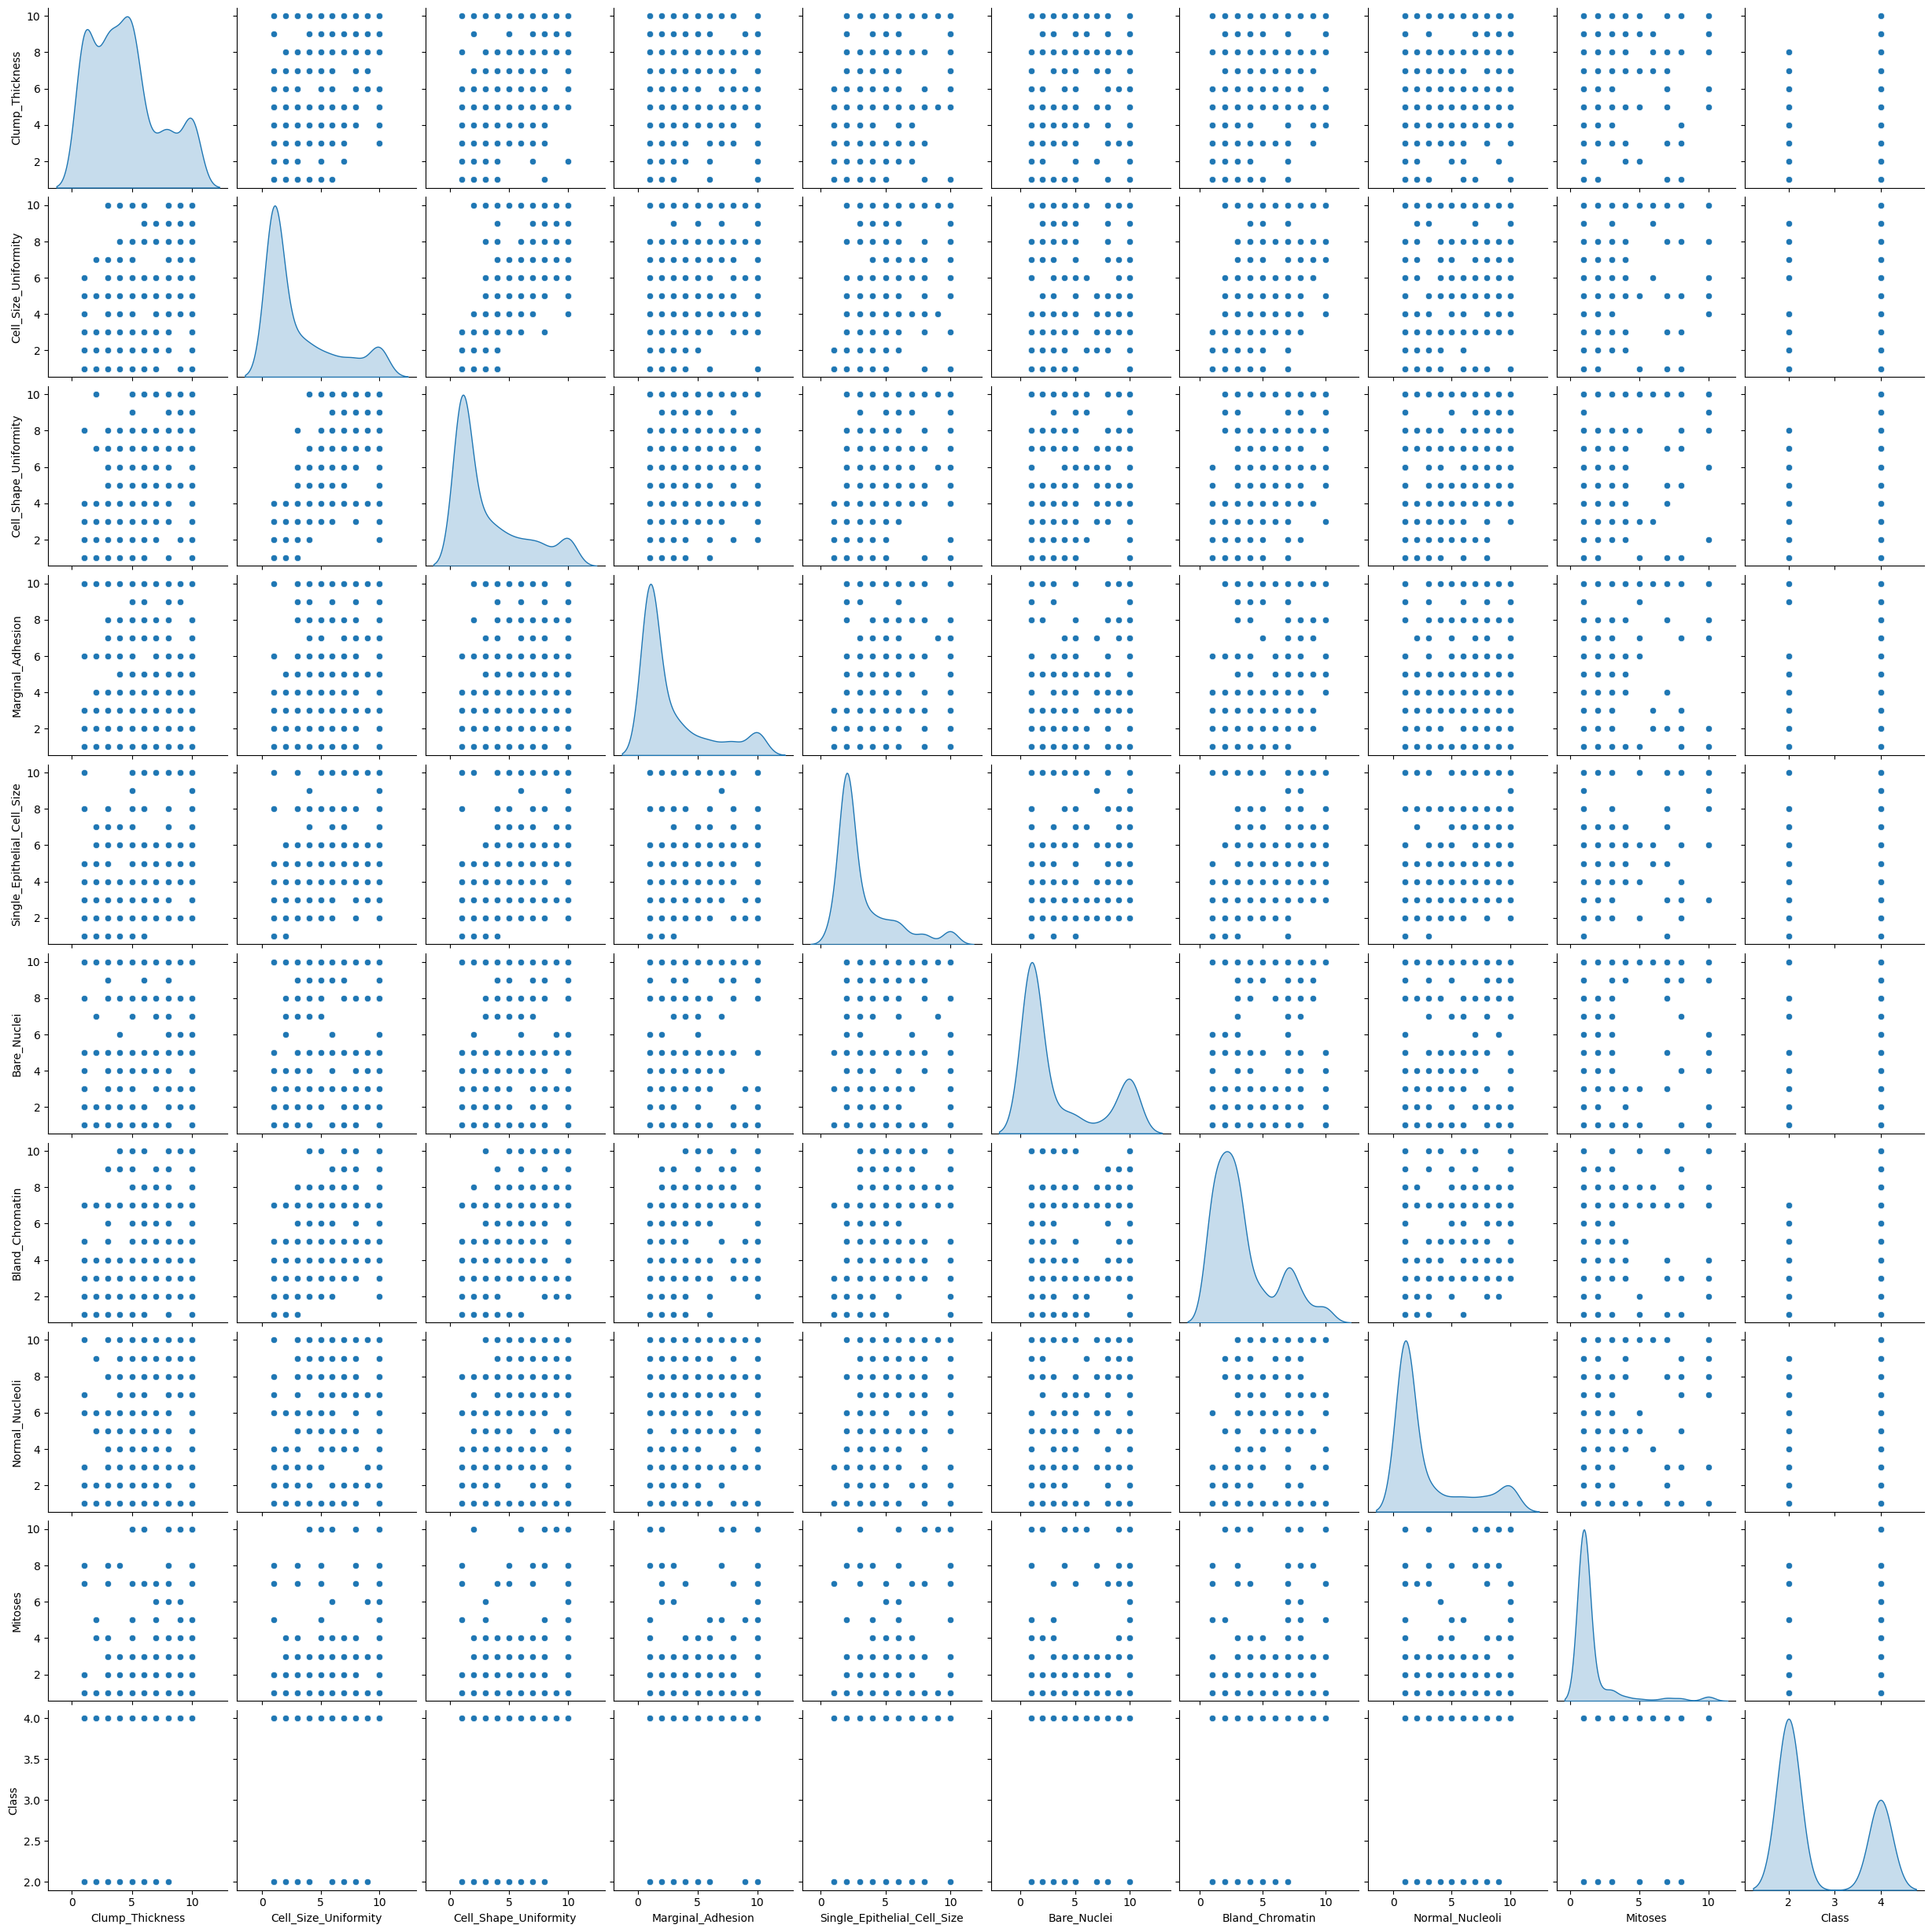

In [12]:
sns.pairplot(df, diag_kind='kde')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_Thickness              699 non-null    int64
 1   Cell_Size_Uniformity         699 non-null    int64
 2   Cell_Shape_Uniformity        699 non-null    int64
 3   Marginal_Adhesion            699 non-null    int64
 4   Single_Epithelial_Cell_Size  699 non-null    int64
 5   Bare_Nuclei                  699 non-null    int32
 6   Bland_Chromatin              699 non-null    int64
 7   Normal_Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 57.3 KB


In [14]:
df.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [15]:
# Export the cleaned dataset
df.to_csv("breast_cancer_cleaned.csv")

In [39]:
# Scale the data using MinMaxScaler
df_s = df.copy()
scaler = MinMaxScaler()
df_s = scaler.fit_transform(df_s)
df_s = pd.DataFrame(df_s, columns=df.columns)

df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              699 non-null    float64
 1   Cell_Size_Uniformity         699 non-null    float64
 2   Cell_Shape_Uniformity        699 non-null    float64
 3   Marginal_Adhesion            699 non-null    float64
 4   Single_Epithelial_Cell_Size  699 non-null    float64
 5   Bare_Nuclei                  699 non-null    float64
 6   Bland_Chromatin              699 non-null    float64
 7   Normal_Nucleoli              699 non-null    float64
 8   Mitoses                      699 non-null    float64
 9   Class                        699 non-null    float64
dtypes: float64(10)
memory usage: 54.7 KB


In [40]:
df_s.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,0.0


In [45]:
df_s['Class'].value_counts()

Class
0.0    458
1.0    241
Name: count, dtype: int64

In [46]:
df_s['Class'] = df_s['Class'].astype(int)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [51]:
# Split the data into train and test sets
X = df_s.drop('Class', axis=1)
y = df_s['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [75]:
# Create a BaggingClassifier
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=seed)

# Fit the BaggingClassifier to the training data
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [54]:
# Check the training data accuracy 
train_preds = bag.predict(X_train)

train_accuracy = accuracy_score(y_train, train_preds)
print(f"Accuracy on the training data: {train_accuracy:.2%}")

Accuracy on the training data: 99.59%


# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [55]:
# Check the test data accuracy
y_preds = bag.predict(X_test)

test_accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy on the test data: {test_accuracy:.2%}")

Accuracy on the test data: 94.76%


The mode is overfitted. Let's use grid search to find the best parameters. 

In [89]:
# USe grid search to find the best parameters
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'estimator__max_depth': [None, 5, 10, 15],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

grid = GridSearchCV(bag, param_grid, cv=5, n_jobs=-1, verbose=3, return_train_score=True)
grid.fit(X_train, y_train)

grid.best_params_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


{'bootstrap': True,
 'bootstrap_features': True,
 'estimator__max_depth': 5,
 'max_features': 0.5,
 'n_estimators': 10}

In [93]:
# Run the BaggingClassifier with the best parameters
base_model = DecisionTreeClassifier(max_depth=5)
bag_best = BaggingClassifier(estimator = DecisionTreeClassifier(), 
                             n_estimators=50, bootstrap=True, bootstrap_features=True, max_features=0.5, random_state=seed)

# Fit the BaggingClassifier to the training data
bag_best.fit(X_train, y_train)

BaggingClassifier(bootstrap_features=True, estimator=DecisionTreeClassifier(),
                  max_features=0.5, n_estimators=50, random_state=42)

In [94]:
# Compare training accuracy with test accuracy 
train_preds_best = bag_best.predict(X_train)

train_accuracy_best = accuracy_score(y_train, train_preds_best)

y_preds_best = bag_best.predict(X_test)

test_accuracy_best = accuracy_score(y_test, y_preds_best)

print(f"Accuracy on the training data: {train_accuracy_best:.2%}")
print(f"Accuracy on the test data: {test_accuracy_best:.2%}")

Accuracy on the training data: 99.59%
Accuracy on the test data: 98.10%


In [95]:
# Check the cross-validation score
cv_scores = cross_val_score(bag_best, X, y, cv=5)
print(f"Cross-validation scores: {np.mean(cv_scores): .2%}")

Cross-validation scores:  96.57%


# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



